#Reading Data using Pandas

In [ ]:
# First, let's load the dataset to understand its structure and the types of data it contains.
import pandas as pd

# Load the dataset
data_path = 'sleep.csv'
sleep_data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
sleep_data.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy


#EDA

In [ ]:
sleep_data.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

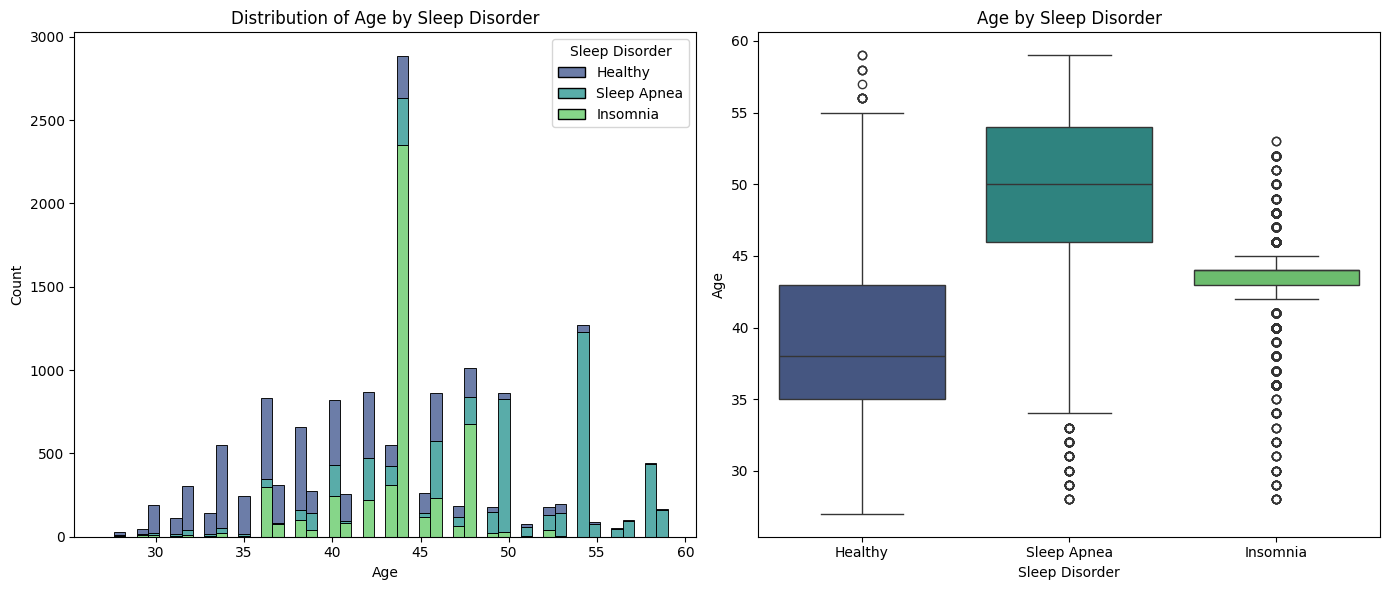

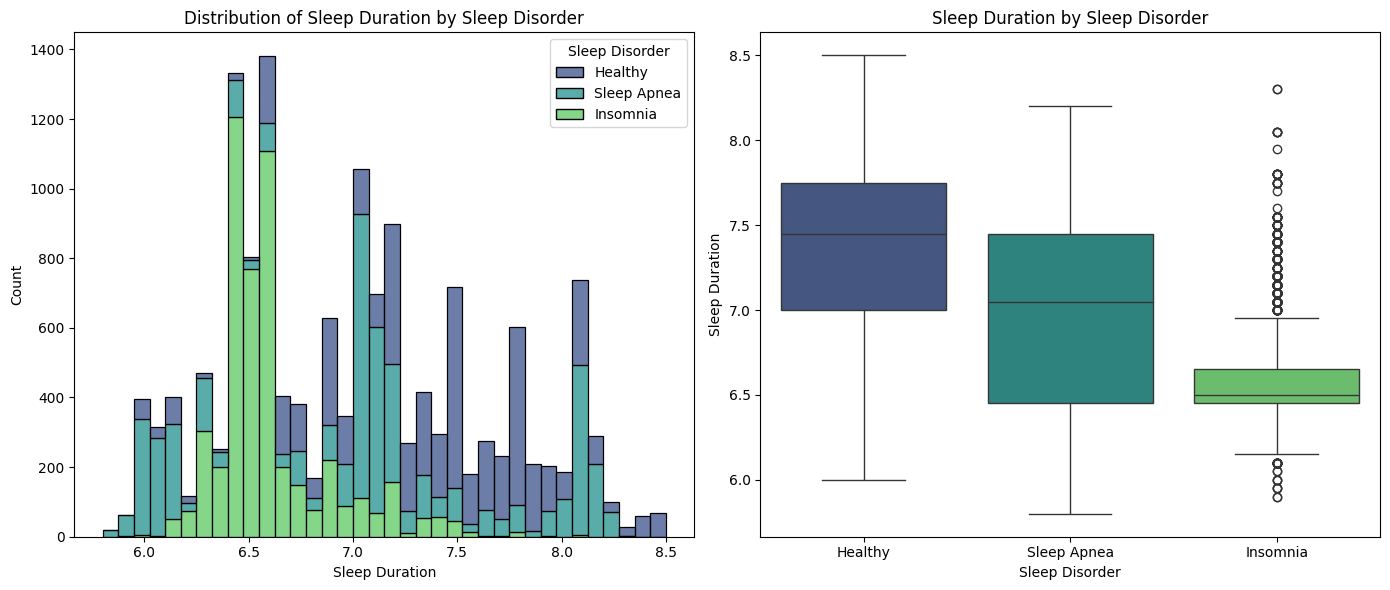

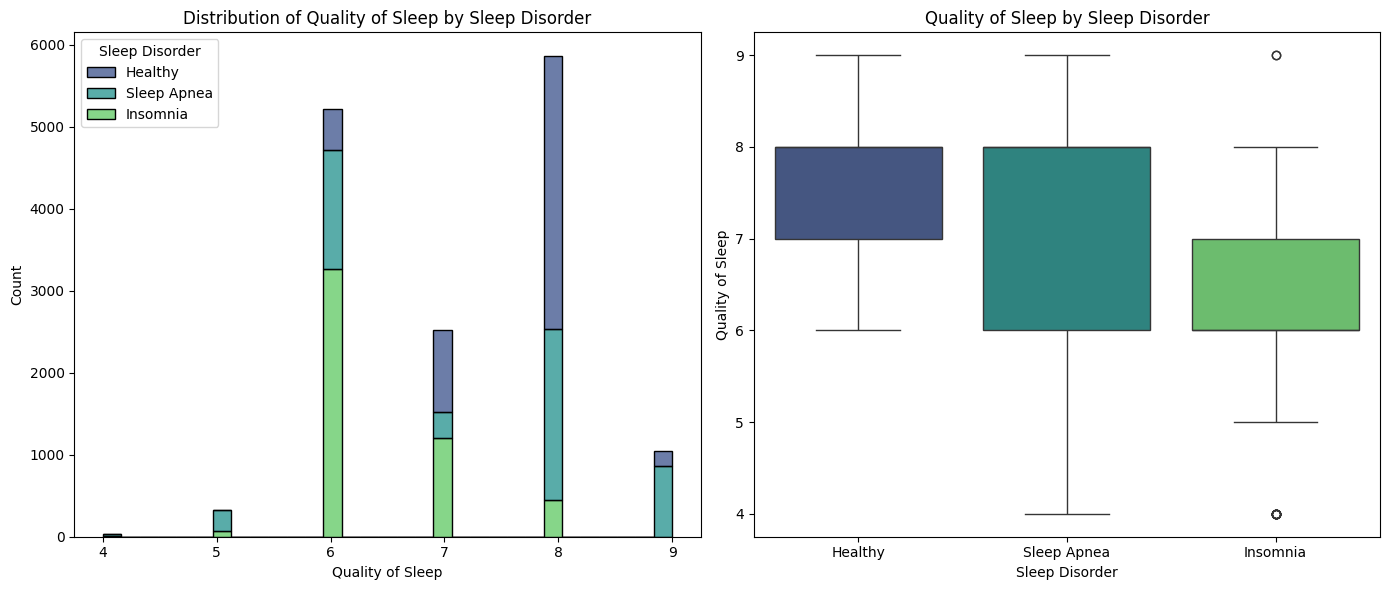

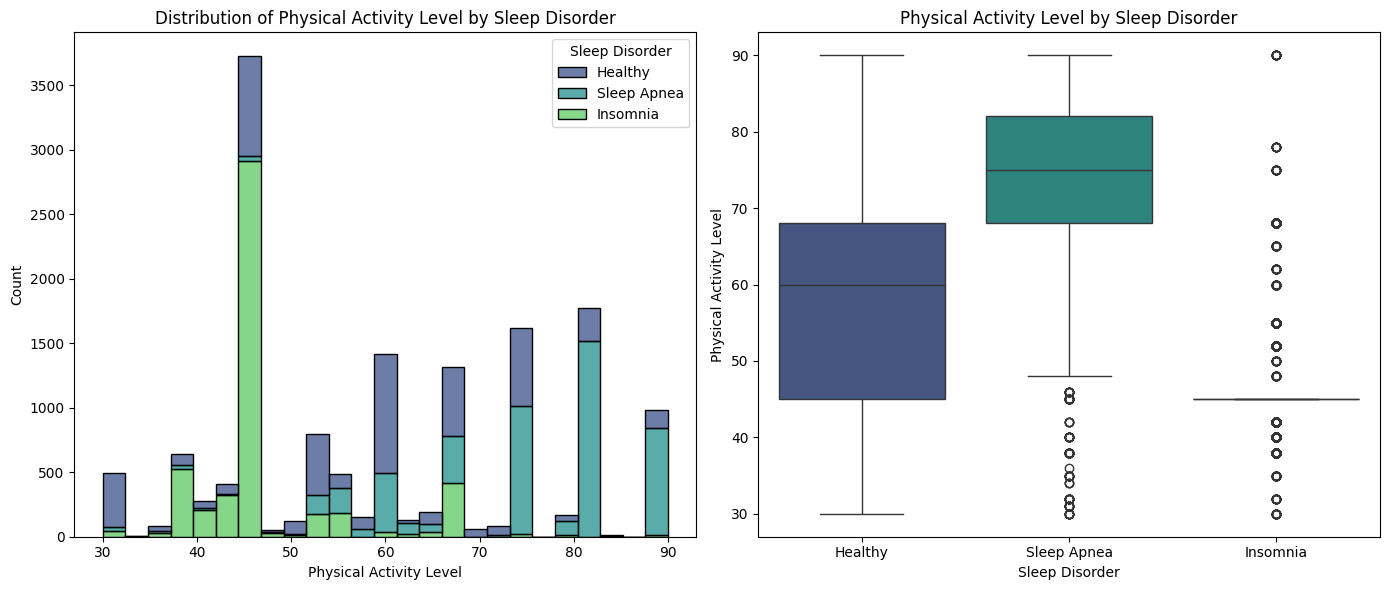

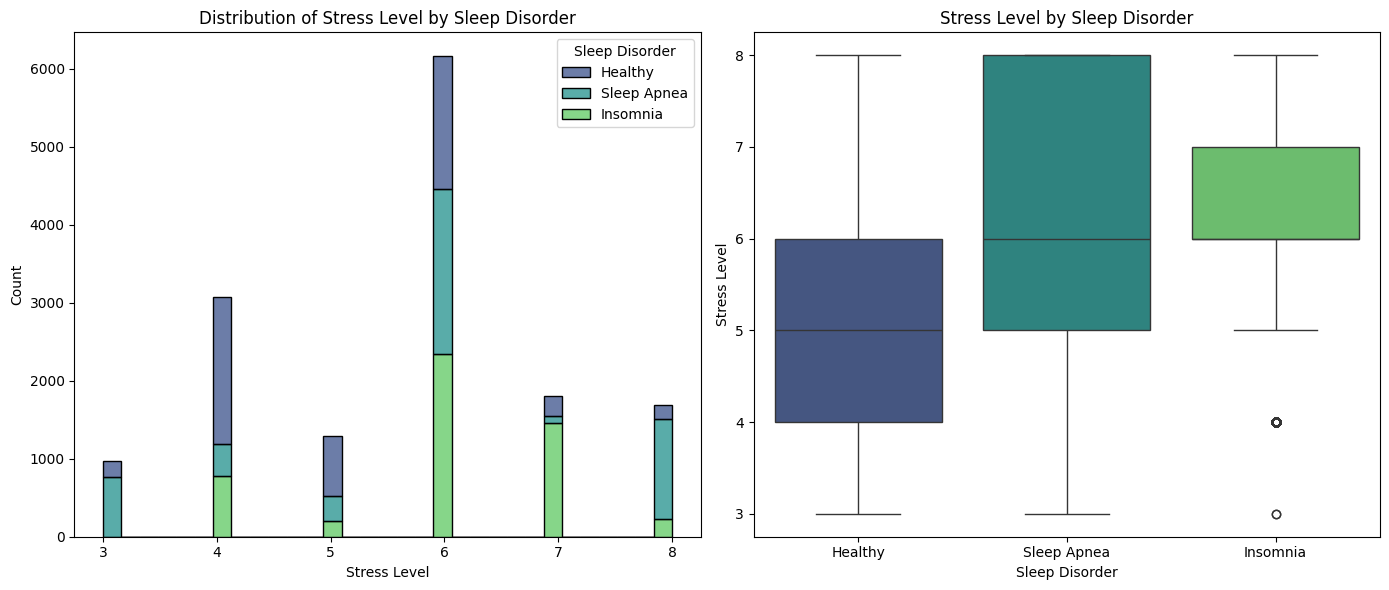

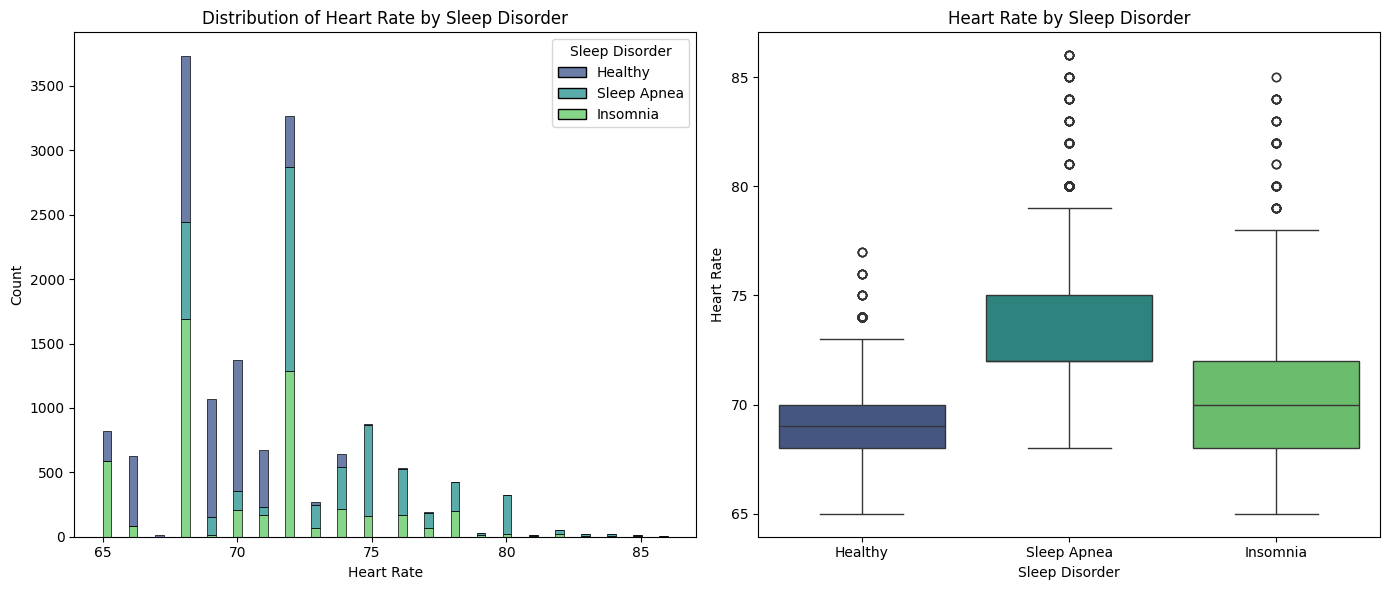

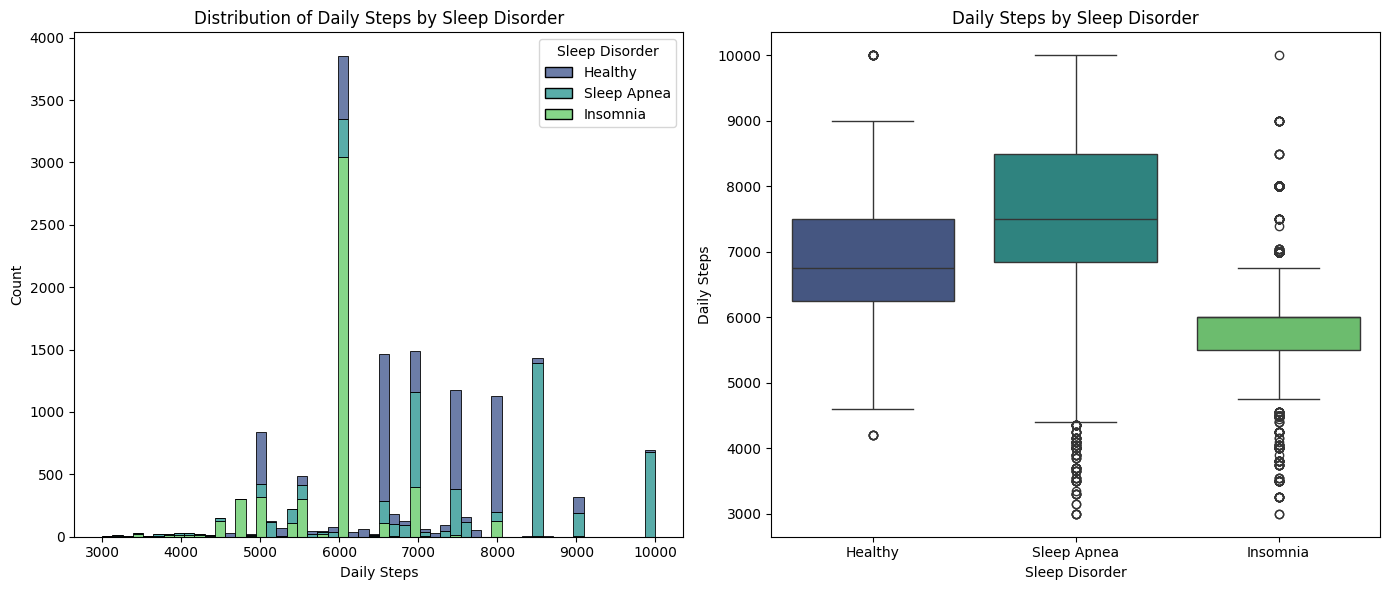

In [ ]:
# Initial EDA to understand the distribution and relations

# Import necessary libraries for EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot distribution and boxplot for each feature against the target
def plot_feature_distribution(df, feature, target):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    # Distribution plot
    sns.histplot(df, x=feature, hue=target, multiple="stack", palette="viridis", ax=ax[0])
    ax[0].set_title(f'Distribution of {feature} by {target}')

    # Boxplot
    sns.boxplot(x=target, y=feature, hue=target, data=df, palette="viridis", ax=ax[1], legend=False)
    ax[1].set_title(f'{feature} by {target}')

    plt.tight_layout()
    plt.show()

# List of numerical features to examine
numerical_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                      'Stress Level', 'Heart Rate', 'Daily Steps']

# Plot distribution and boxplot for each numerical feature
for feature in numerical_features:
    plot_feature_distribution(sleep_data, feature, 'Sleep Disorder')


In [ ]:
import pandas as pd

# Load data
sleep_data = pd.read_csv('sleep.csv')

# Remove duplicates
deduplicated_data = sleep_data.drop_duplicates()
deduplicated_size_initial = deduplicated_data.shape[0]
duplicates_removed_initial = sleep_data.shape[0] - deduplicated_size_initial

# Calculate the IQR for each numerical column, excluding non-numeric columns
Q1 = deduplicated_data.select_dtypes(include=['number']).quantile(0.25)
Q3 = deduplicated_data.select_dtypes(include=['number']).quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers only in numeric columns
numeric_cols = deduplicated_data.select_dtypes(include=['number']).columns
filtered_data = deduplicated_data[~((deduplicated_data[numeric_cols] < (Q1 - 1.5 * IQR)) | (deduplicated_data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Compare the original, deduplicated, and filtered dataset sizes
original_size = sleep_data.shape[0]
filtered_size = filtered_data.shape[0]
rows_removed = original_size - filtered_size

print(f"Original size: {original_size}")
print(f"Deduplicated size: {deduplicated_size_initial}")
print(f"Rows removed due to duplicates initially: {duplicates_removed_initial}")
print(f"Filtered size after outlier and duplicate removal: {filtered_size}")
print(f"Rows removed in total: {rows_removed}")


Original size: 15000
Deduplicated size: 15000
Rows removed due to duplicates initially: 0
Filtered size after outlier and duplicate removal: 14520
Rows removed in total: 480


In [ ]:
filtered_data = filtered_data.rename(columns=str.lower) \
                             .rename(columns=lambda x: x.replace(' ', '_'))

# Assuming the column to remove is 'unwanted_column'
filtered_data = filtered_data.drop(columns=['person_id'])

# Now, filtered_data has columns that are lowercase, have underscores instead of spaces, and the unwanted column is removed
print(filtered_data)

       gender  age         occupation  sleep_duration  quality_of_sleep  \
0        Male   35             Doctor            6.65                 7   
1        Male   42            Teacher            6.90                 8   
2        Male   34  Software Engineer            6.95                 7   
3        Male   32             Doctor            6.90                 6   
4        Male   37             Lawyer            6.85                 7   
...       ...  ...                ...             ...               ...   
14995  Female   59              Nurse            8.10                 9   
14996  Female   59              Nurse            8.00                 9   
14997  Female   59              Nurse            8.10                 9   
14998  Female   59              Nurse            8.10                 9   
14999  Female   59              Nurse            8.10                 9   

       physical_activity_level  stress_level   bmi_category blood_pressure  \
0                    

In [ ]:
# Checking for missing values in the dataset
missing_values = filtered_data.isnull().sum()

# Summary statistics of the numerical columns
summary_statistics = filtered_data.describe()

missing_values, summary_statistics


(gender                     0
 age                        0
 occupation                 0
 sleep_duration             0
 quality_of_sleep           0
 physical_activity_level    0
 stress_level               0
 bmi_category               0
 blood_pressure             0
 heart_rate                 0
 daily_steps                0
 sleep_disorder             0
 dtype: int64,
                 age  sleep_duration  quality_of_sleep  \
 count  14520.000000    14520.000000      14520.000000   
 mean      44.226791        7.008681          7.163636   
 std        6.840020        0.614879          1.027791   
 min       28.000000        5.850000          4.000000   
 25%       40.000000        6.500000          6.000000   
 50%       44.000000        7.000000          7.000000   
 75%       48.000000        7.450000          8.000000   
 max       59.000000        8.500000          9.000000   
 
        physical_activity_level  stress_level    heart_rate   daily_steps  
 count             14520.

In [ ]:
print(filtered_data.columns)

Index(['gender', 'age', 'occupation', 'sleep_duration', 'quality_of_sleep',
       'physical_activity_level', 'stress_level', 'bmi_category',
       'blood_pressure', 'heart_rate', 'daily_steps', 'sleep_disorder'],
      dtype='object')


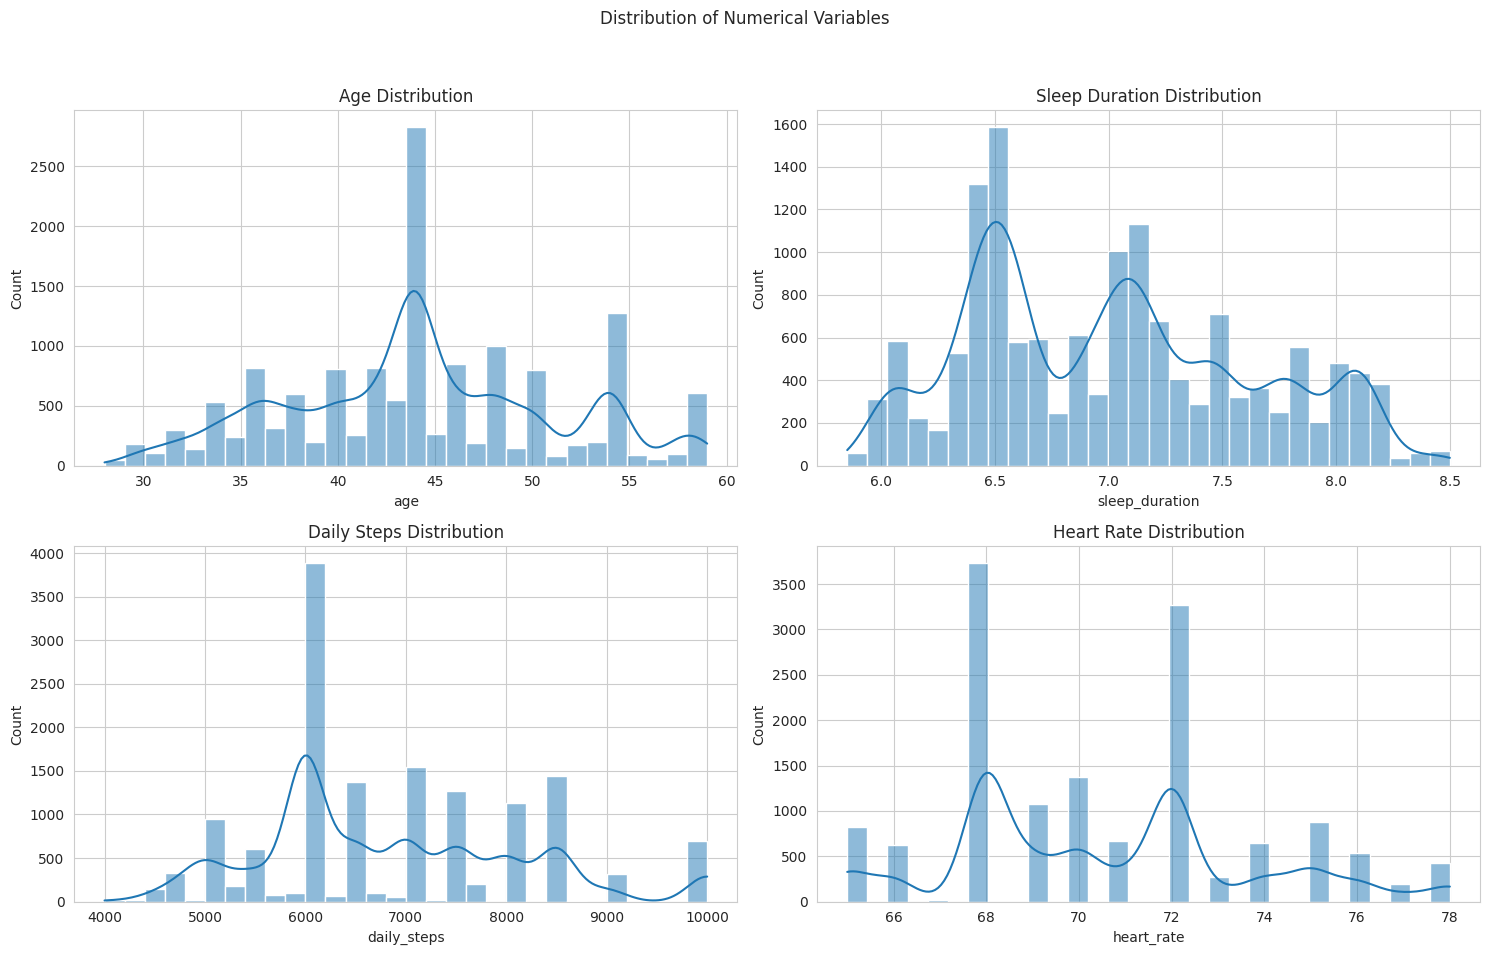

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set_style("whitegrid")

# Histograms for numerical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Variables')

# Age
sns.histplot(filtered_data['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Sleep Duration
sns.histplot(filtered_data['sleep_duration'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Sleep Duration Distribution')

# Daily Steps
sns.histplot(filtered_data['daily_steps'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Daily Steps Distribution')

# Heart Rate
sns.histplot(filtered_data['heart_rate'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Heart Rate Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()


#Preprocessing

In [ ]:
import pandas as pd

def preprocess_data(filtered_data) -> pd.DataFrame:
    """
    Preprocessing pipeline tailored to specific mappings and transformations for multi-class classification.
    """
    # Define mappings for categorical transformations
    cast_cat = {
        'Healthy': 0,
        'Sleep Apnea': 1,
        'Insomnia': 2
    }

    bmi_mapping = {
        'Overweight': 1,
        'Normal': 0,
        'Obese': 1,
        'Normal Weight': 0,
    }

    occupations_mapping = {
        'Software Engineer': 'technical',
        'Doctor': 'medical',
        'Sales Representative': 'humanities',
        'Teacher': 'humanities',
        'Nurse': 'medical',
        'Engineer': 'technical',
        'Accountant': 'technical',
        'Scientist': 'technical',
        'Lawyer': 'humanities',
        'Salesperson': 'humanities',
        'Manager': 'humanities'
    }

    # Apply mappings and preprocessing
    processed_filtered_data = (filtered_data
                    .assign(
                        # Mapping 'sleep_disorder' according to classification
                        sleep_issue=filtered_data['sleep_disorder'].map(cast_cat).astype('uint8'),
                        # Mapping 'bmi_category' according to health risk
                        elevated_bmi=filtered_data['bmi_category'].map(bmi_mapping).astype('uint8'),
                        # Mapping 'occupation' to broader categories
                        work_field=filtered_data['occupation'].map(occupations_mapping),
                        # Splitting 'blood_pressure' into systolic and diastolic
                        systolic_bp=filtered_data['blood_pressure'].str.split('/', expand=True)[0].astype('int64'),
                        diastolic_bp=filtered_data['blood_pressure'].str.split('/', expand=True)[1].astype('int64'),
                    )
                    # Drop original columns that have been mapped or encoded
                    .drop(columns=['occupation', 'bmi_category', 'blood_pressure', 'sleep_disorder'])
                    .pipe(lambda df:
                          df.join(pd.get_dummies(df['gender'], prefix='is', drop_first=True))  # One-hot encode 'gender'
                             .join(pd.get_dummies(df['work_field'], prefix='wf', drop_first=False))  # One-hot encode 'work_field'
                             .drop(columns=['gender', 'work_field'])  # Drop processed columns after encoding
                         )
                    )

    return processed_filtered_data


In [ ]:
# Assuming preprocess_data is already defined as per your code
processed_filtered_data = preprocess_data(filtered_data)


In [ ]:
print(processed_filtered_data.head())


   age  sleep_duration  quality_of_sleep  physical_activity_level  \
0   35            6.65                 7                       50   
1   42            6.90                 8                       52   
2   34            6.95                 7                       66   
3   32            6.90                 6                       52   
4   37            6.85                 7                       60   

   stress_level  heart_rate  daily_steps  sleep_issue  elevated_bmi  \
0             7          71         7100            0             0   
1             4          66         7000            0             0   
2             6          74         6100            0             1   
3             7          71         6500            0             0   
4             6          71         6500            0             0   

   systolic_bp  diastolic_bp  is_Male  wf_humanities  wf_medical  wf_technical  
0          120            80     True          False        True         Fals

In [ ]:
processed_filtered_data.shape

(14520, 15)

#Feature Extraction using PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'processed_filtered_data' is your DataFrame after preprocessing
features = processed_filtered_data.columns  # All columns are features after preprocessing

# Separating out the features
x = processed_filtered_data.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)


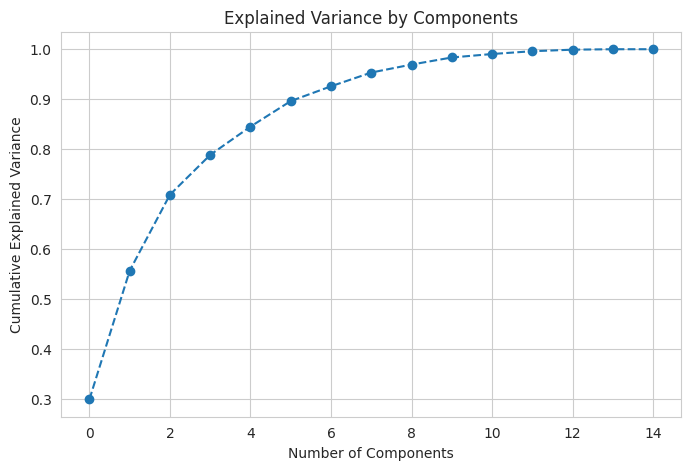

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(x)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot or simply check where cumulative variance reaches your desired threshold
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()


In [ ]:
# Assuming 'original_data' is your DataFrame containing the original feature data
# Get the loadings (coefficients) of each feature on each principal component
loadings = pca.components_

# Create a DataFrame to display the loadings
loadings_filtered_data = pd.DataFrame(loadings, columns=processed_filtered_data.columns)

# Print the top features contributing to each principal component
num_top_features = 16 # Change this value as desired
for i, pc in enumerate(loadings_filtered_data.index):
    print(f"\nTop {num_top_features} features contributing to Principal Component {i+1}:")
    top_features = loadings_filtered_data.iloc[i].sort_values(ascending=False)[:num_top_features]
    print(top_features)



Top 16 features contributing to Principal Component 1:
wf_technical               0.246948
sleep_duration             0.202802
is_Male                    0.169785
quality_of_sleep           0.132157
wf_humanities              0.022516
daily_steps               -0.180191
stress_level              -0.205504
physical_activity_level   -0.205656
wf_medical                -0.228924
sleep_issue               -0.242264
heart_rate                -0.257275
age                       -0.286144
elevated_bmi              -0.365446
systolic_bp               -0.408360
diastolic_bp              -0.417872
Name: 0, dtype: float64

Top 16 features contributing to Principal Component 2:
wf_humanities              0.312058
stress_level               0.302699
sleep_issue                0.283275
is_Male                    0.196554
heart_rate                 0.116526
elevated_bmi               0.112609
wf_technical              -0.063952
systolic_bp               -0.067541
diastolic_bp              -0.108173


#Building ML Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier

# Load and preprocess your data
# processed_filtered_data = preprocess_data(your_raw_data)

# Assuming 'processed_filtered_data' is the preprocessed DataFrame and 'sleep_issue' is the target column
X = processed_filtered_data.drop('sleep_issue', axis=1)
y = processed_filtered_data['sleep_issue']

# Binarize the output for multi-class ROC-AUC
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# List of models to train
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(probability=True),  # probability=True to use roc_auc_score
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "KNN": KNeighborsClassifier()
}

# Dictionary to hold performance metrics
performance_metrics = {name: {} for name in classifiers.keys()}

# Train and evaluate each model
for name, clf in classifiers.items():
    model = OneVsRestClassifier(clf).fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    y_proba_train = model.predict_proba(X_train)
    y_proba_test = model.predict_proba(X_test)

    # Calculate metrics for both train and test
    performance_metrics[name]['Train Accuracy'] = accuracy_score(y_train, y_pred_train)
    performance_metrics[name]['Test Accuracy'] = accuracy_score(y_test, y_pred_test)

    performance_metrics[name]['Train Precision'] = precision_score(y_train, y_pred_train, average='weighted', zero_division=0)
    performance_metrics[name]['Test Precision'] = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)

    performance_metrics[name]['Train Recall'] = recall_score(y_train, y_pred_train, average='weighted')
    performance_metrics[name]['Test Recall'] = recall_score(y_test, y_pred_test, average='weighted')

    performance_metrics[name]['Train F1 Score'] = f1_score(y_train, y_pred_train, average='weighted')
    performance_metrics[name]['Test F1 Score'] = f1_score(y_test, y_pred_test, average='weighted')

    performance_metrics[name]['Train ROC AUC'] = roc_auc_score(y_train, y_proba_train, multi_class='ovr', average='weighted')
    performance_metrics[name]['Test ROC AUC'] = roc_auc_score(y_test, y_proba_test, multi_class='ovr', average='weighted')

# Convert the performance metrics dictionary to a DataFrame for easy viewing
performance_filtered_data = pd.DataFrame(performance_metrics).T

# Display the performance DataFrame
print(performance_filtered_data)


                     Train Accuracy  Test Accuracy  Train Precision  \
Decision Tree              0.985045       0.944674         0.991579   
Extra Trees                0.985045       0.954775         0.991579   
XGBoost                    0.982487       0.963728         0.985432   
Gradient Boosting          0.948347       0.943756         0.963807   
Random Forest              0.987210       0.960055         0.989448   
SVC                        0.453365       0.453398         0.434586   
Logistic Regression        0.840811       0.843893         0.903798   
KNN                        0.969599       0.956841         0.973268   

                     Test Precision  Train Recall  Test Recall  \
Decision Tree              0.959452      0.985045     0.954775   
Extra Trees                0.961214      0.985045     0.955693   
XGBoost                    0.970270      0.983176     0.965794   
Gradient Boosting          0.959927      0.954939     0.948806   
Random Forest              0.9

In [ ]:
# Assuming all previous code is unchanged and performance_filtered_data is already created

# Sort the performance DataFrame by 'Test Accuracy' in descending order
sorted_performance_filtered_data = performance_filtered_data.sort_values(by='Test Accuracy', ascending=False)

# Display the sorted performance DataFrame
print(sorted_performance_filtered_data)


                     Train Accuracy  Test Accuracy  Train Precision  \
XGBoost                    0.982487       0.963728         0.985432   
Random Forest              0.987210       0.960055         0.989448   
KNN                        0.969599       0.956841         0.973268   
Extra Trees                0.985045       0.954775         0.991579   
Decision Tree              0.985045       0.944674         0.991579   
Gradient Boosting          0.948347       0.943756         0.963807   
Logistic Regression        0.840811       0.843893         0.903798   
SVC                        0.453365       0.453398         0.434586   

                     Test Precision  Train Recall  Test Recall  \
XGBoost                    0.970270      0.983176     0.965794   
Random Forest              0.966110      0.987210     0.961203   
KNN                        0.960649      0.969599     0.956841   
Extra Trees                0.961214      0.985045     0.955693   
Decision Tree              0.9

#Hyperparameter Tuning on Best Performing 4 models

#Hyperparameter Tuning using RandomizedCV

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import pandas as pd

# Define parameter distributions for each classifier
param_distributions = {
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.75, 1.0],
        'colsample_bytree': [0.75, 1.0],
        'gamma': [0, 0.1],
        'min_child_weight': [1, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.75, 1.0],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 4]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 4],
        'max_features': ['sqrt'],
        'bootstrap': [True]
    },
    'Extra Trees': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 4],
        'max_features': ['sqrt'],
        'bootstrap': [True]
    }
}

# Initialize classifiers
classifiers = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Split your dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Results dictionary to hold the best models
best_estimators = {}

# Perform Randomized Search
for clf_name in classifiers:
    rnd_search = RandomizedSearchCV(estimator=classifiers[clf_name], param_distributions=param_distributions[clf_name],
                                    n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
    rnd_search.fit(X_train, y_train)
    best_estimators[clf_name] = rnd_search.best_estimator_
    print(f"Best parameters for {clf_name}: {rnd_search.best_params_}")
    print(f"Best cross-validation score for {clf_name}: {rnd_search.best_score_}")

    # Calculate and print performance metrics for train and test sets
    y_pred_train = best_estimators[clf_name].predict(X_train)
    y_pred_test = best_estimators[clf_name].predict(X_test)

    # Get the probabilities for ROC AUC score calculation
    if hasattr(best_estimators[clf_name], "predict_proba"):
        y_probs_train = best_estimators[clf_name].predict_proba(X_train)
        y_probs_test = best_estimators[clf_name].predict_proba(X_test)
    else:
        # For models that do not have predict_proba (like SVM with specific kernels), use decision function
        y_probs_train = best_estimators[clf_name].decision_function(X_train)
        y_probs_test = best_estimators[clf_name].decision_function(X_test)

    # ROC AUC calculations for multiclass
    train_roc_auc = roc_auc_score(y_train, y_probs_train, multi_class="ovr")
    test_roc_auc = roc_auc_score(y_test, y_probs_test, multi_class="ovr")

    # Other metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_precision = precision_score(y_train, y_pred_train, average='weighted')
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    train_recall = recall_score(y_train, y_pred_train, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    train_f1 = f1_score(y_train, y_pred_train, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')

    # Print metrics
    print(f"Train Accuracy for {clf_name}: {train_accuracy}")
    print(f"Test Accuracy for {clf_name}: {test_accuracy}")
    print(f"Train Precision for {clf_name}: {train_precision}")
    print(f"Test Precision for {clf_name}: {test_precision}")
    print(f"Train Recall for {clf_name}: {train_recall}")
    print(f"Test Recall for {clf_name}: {test_recall}")
    print(f"Train F1 Score for {clf_name}: {train_f1}")
    print(f"Test F1 Score for {clf_name}: {test_f1}")
    print(f"Train ROC AUC Score for {clf_name}: {train_roc_auc}")
    print(f"Test ROC AUC Score for {clf_name}: {test_roc_auc}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.75}
Best cross-validation score for XGBoost: 0.9689218716079495
Train Accuracy for XGBoost: 0.9791666666666666
Test Accuracy for XGBoost: 0.96866391184573
Train Precision for XGBoost: 0.9792270833781562
Test Precision for XGBoost: 0.9687734639217515
Train Recall for XGBoost: 0.9791666666666666
Test Recall for XGBoost: 0.96866391184573
Train F1 Score for XGBoost: 0.9791535037721258
Test F1 Score for XGBoost: 0.9686751079059124
Train ROC AUC Score for XGBoost: 0.9984720477361133
Test ROC AUC Score for XGBoost: 0.9958590778776878
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best cross-va

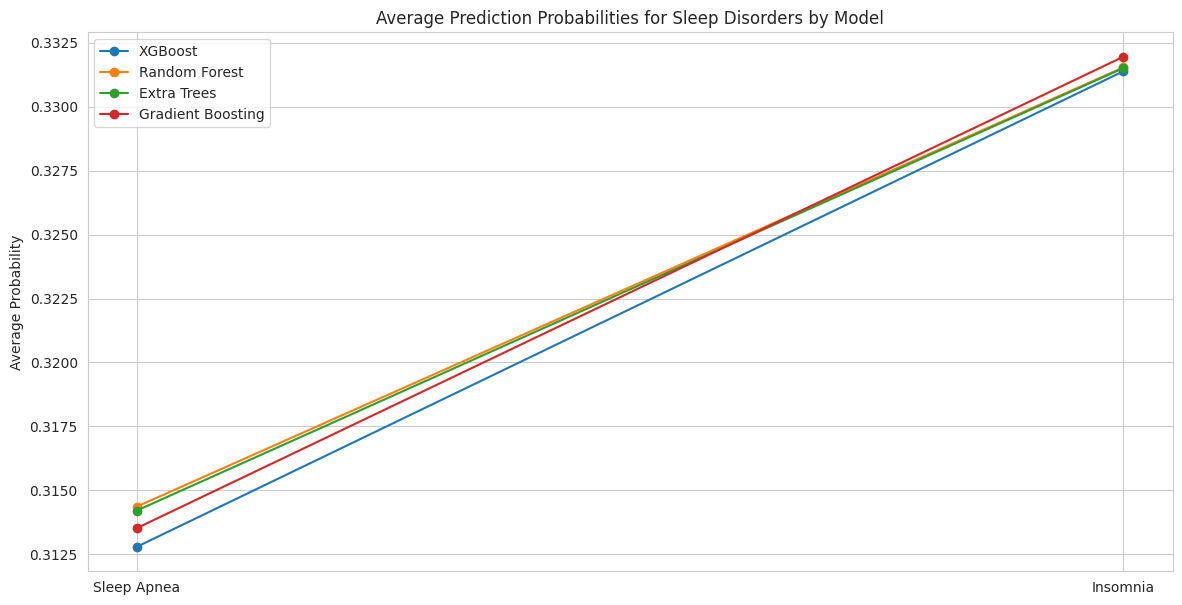

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming best_estimators is already populated with the best models from RandomizedSearchCV
# Example: best_estimators = {'XGBoost': best_xgb, 'Random Forest': best_rf, ...}

# Initialize the plot
plt.figure(figsize=(14, 7))

# Define class indices based on your specific classes
# Update these indices according to how your classes are encoded in your y_test
class_indices = {'Sleep Apnea': 1, 'Insomnia': 2}

# Loop through each model to calculate and plot the average probabilities
for model_name, model in best_estimators.items():
    # Get the predicted probabilities for the test set from each best model
    y_proba_test = model.predict_proba(X_test)

    # Extract probabilities for 'Sleep Apnea' and 'Insomnia'
    sleep_apnea_proba = y_proba_test[:, class_indices['Sleep Apnea']]
    insomnia_proba = y_proba_test[:, class_indices['Insomnia']]

    # Calculate the average probability for 'Sleep Apnea' and 'Insomnia'
    avg_sleep_apnea_proba = np.mean(sleep_apnea_proba)
    avg_insomnia_proba = np.mean(insomnia_proba)

    # Plotting each model's average probability for 'Sleep Apnea' and 'Insomnia'
    plt.plot([1, 2], [avg_sleep_apnea_proba, avg_insomnia_proba], label=model_name, marker='o')

# Configure plot
plt.xticks([1, 2], ['Sleep Apnea', 'Insomnia'])
plt.ylabel('Average Probability')
plt.title('Average Prediction Probabilities for Sleep Disorders by Model')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


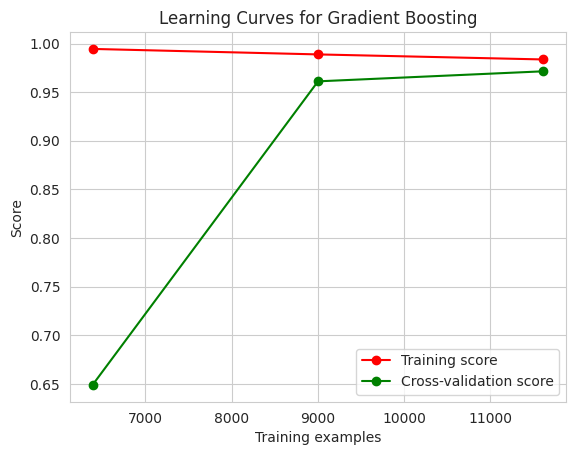

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title(f'Learning Curves for {model_name}')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()


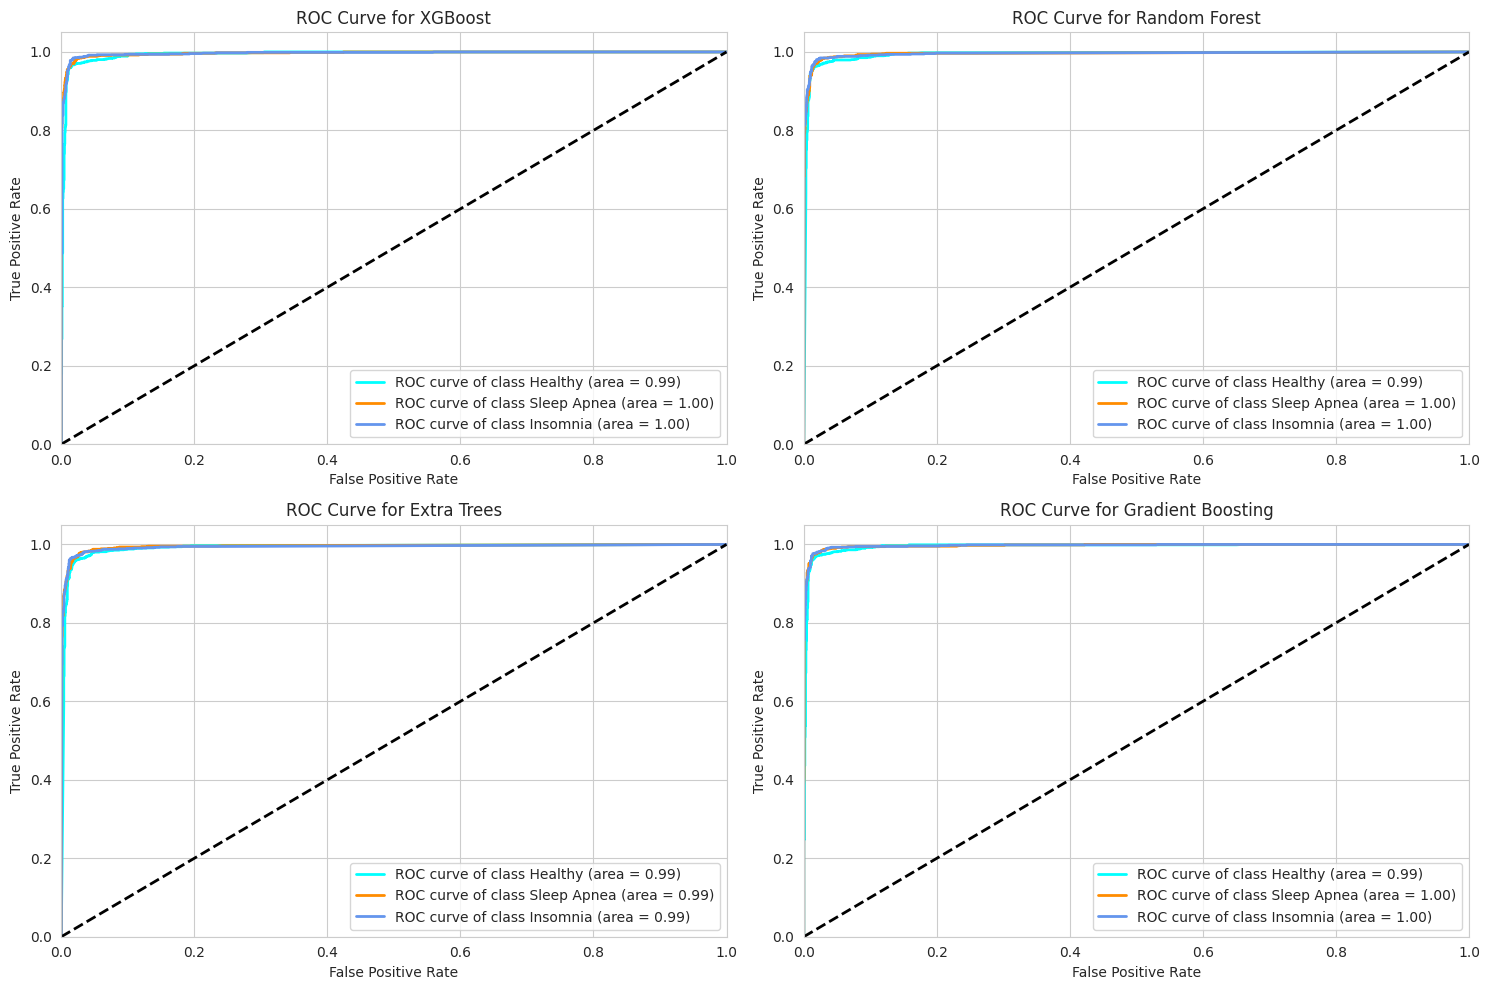

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Class names mapping
class_names = {0: 'Healthy', 1: 'Sleep Apnea', 2: 'Insomnia'}

# Binarize the output
y_bin = label_binarize(y, classes=[*range(n_classes)])
n_classes = y_bin.shape[1]

# Assuming X and y are your data features and target
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Create a subplot for each classifier
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, (clf_name, model) in enumerate(best_estimators.items()):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for j in range(n_classes):
            fpr[j], tpr[j], _ = roc_curve(y_test[:, j], y_score[:, j])
            roc_auc[j] = auc(fpr[j], tpr[j])

        # Plot all ROC curves for the current classifier
        for j, color in zip(range(n_classes), colors):
            ax[i].plot(fpr[j], tpr[j], color=color, lw=2,
                       label=f'ROC curve of class {class_names[j]} (area = {roc_auc[j]:0.2f})')

        ax[i].plot([0, 1], [0, 1], 'k--', lw=2)
        ax[i].set_xlim([0.0, 1.0])
        ax[i].set_ylim([0.0, 1.05])
        ax[i].set_xlabel('False Positive Rate')
        ax[i].set_ylabel('True Positive Rate')
        ax[i].set_title(f'ROC Curve for {clf_name}')
        ax[i].legend(loc="lower right")

plt.tight_layout()
plt.show()


In [ ]:
import pickle

# Assuming the RandomizedSearchCV process is completed and the best estimator for XGBoost is stored in best_estimators
tuned_xgboost_model = best_estimators['XGBoost']

# Specify the filename for the .pkl file
filename = 'sleep_modelxgb.pkl'

# Open the file in binary write mode and dump the tuned XGBoost model into it
with open(filename, 'wb') as file:
    pickle.dump(tuned_xgboost_model, file)

print(f'Model saved to {filename}')


Model saved to sleep_modelxgb.pkl


#Testing Model performance on seen data

In [ ]:
import pickle
import pandas as pd

# Load the previously saved model
filename = 'sleep_modelxgb.pkl'
with open(filename, 'rb') as file:
    best_xgb = pickle.load(file)

# Define a new observation with your feature names and values
new_observation = {
    'age': 30 ,
    'sleep_duration': 7.9,
    'quality_of_sleep': 8,
    'physical_activity_level': 75,
    'stress_level': 5,
    'heart_rate': 70,
    'daily_steps': 7400,
    'elevated_bmi': 0,
    'systolic_bp': 120,
    'diastolic_bp': 80,
    'is_Male': 1,
    'wf_humanities': 0,
    'wf_medical': 1,
    'wf_technical': 0,
}

# Convert the new observation into a DataFrame
new_observation_df = pd.DataFrame([new_observation])

# Use the loaded model to predict the class for the new observation
predicted_class_num = best_xgb.predict(new_observation_df)[0]

# Mapping from numerical labels to descriptive labels
class_mapping = {
    0: 'Healthy',
    1: 'Sleep Apnea',
    2: 'Insomnia'
}

# Translate the numerical prediction to a descriptive label
predicted_class_label = class_mapping[predicted_class_num]

# Print the predicted class label
print(f"Predicted class label: {predicted_class_label}")


Predicted class label: Healthy


In [ ]:
import pickle
import pandas as pd

# Load the previously saved model
filename = 'sleep_modelxgb.pkl'
with open(filename, 'rb') as file:
    best_xgb = pickle.load(file)

# Define a new observation with your feature names and values
new_observation = {
    'age': 59 ,
    'sleep_duration': 8.15,
    'quality_of_sleep': 9,
    'physical_activity_level': 75,
    'stress_level': 3,
    'heart_rate': 68,
    'daily_steps': 7000,
    'elevated_bmi': 1,
    'systolic_bp': 140,
    'diastolic_bp': 95,
    'is_Male': 0,
    'wf_humanities': 0,
    'wf_medical': 1,
    'wf_technical': 0,
}

# Convert the new observation into a DataFrame
new_observation_df = pd.DataFrame([new_observation])

# Use the loaded model to predict the class for the new observation
predicted_class_num = best_xgb.predict(new_observation_df)[0]

# Mapping from numerical labels to descriptive labels
class_mapping = {
    0: 'Healthy',
    1: 'Sleep Apnea',
    2: 'Insomnia'
}

# Translate the numerical prediction to a descriptive label
predicted_class_label = class_mapping[predicted_class_num]

# Print the predicted class label
print(f"Predicted class label: {predicted_class_label}")


Predicted class label: Sleep Apnea


In [ ]:
import pickle
import pandas as pd

# Load the previously saved model
filename = 'sleep_modelxgb.pkl'
with open(filename, 'rb') as file:
    best_xgb = pickle.load(file)

# Define a new observation with your feature names and values
new_observation = {
    'age': 44 ,
    'sleep_duration': 6.45,
    'quality_of_sleep': 6,
    'physical_activity_level': 45,
    'stress_level': 6,
    'heart_rate': 68,
    'daily_steps': 6000,
    'elevated_bmi': 1,
    'systolic_bp': 135,
    'diastolic_bp': 90,
    'is_Male': 1,
    'wf_humanities': 1,
    'wf_medical': 0,
    'wf_technical': 0,
}

# Convert the new observation into a DataFrame
new_observation_df = pd.DataFrame([new_observation])

# Use the loaded model to predict the class for the new observation
predicted_class_num = best_xgb.predict(new_observation_df)[0]

# Mapping from numerical labels to descriptive labels
class_mapping = {
    0: 'Healthy',
    1: 'Sleep Apnea',
    2: 'Insomnia'
}

# Translate the numerical prediction to a descriptive label
predicted_class_label = class_mapping[predicted_class_num]

# Print the predicted class label
print(f"Predicted class label: {predicted_class_label}")


Predicted class label: Insomnia


#Testing model on Unseen Data

In [ ]:
import pickle
import pandas as pd

# Load the previously saved model
filename = 'sleep_modelxgb.pkl'
with open(filename, 'rb') as file:
    best_xgb = pickle.load(file)

# Define a new observation with your feature names and values
new_observation = {
    'age': 43,
    'sleep_duration': 3,
    'quality_of_sleep': 3,
    'physical_activity_level': 60,
    'stress_level': 7,
    'heart_rate': 75,
    'daily_steps': 6000,
    'elevated_bmi': 0,
    'systolic_bp': 120,
    'diastolic_bp': 80,
    'is_Male': 0,
    'wf_humanities': 1,
    'wf_medical': 0,
    'wf_technical': 0,
}

# Convert the new observation into a DataFrame
new_observation_df = pd.DataFrame([new_observation])

# Use the loaded model to predict the class for the new observation
predicted_class_num = best_xgb.predict(new_observation_df)[0]

# Mapping from numerical labels to descriptive labels
class_mapping = {
    0: 'Healthy',
    1: 'Sleep Apnea',
    2: 'Insomnia'
}

# Translate the numerical prediction to a descriptive label
predicted_class_label = class_mapping[predicted_class_num]

# Print the predicted class label
print(f"Predicted class label: {predicted_class_label}")


Predicted class label: Sleep Apnea


In [4]:
import pickle
import pandas as pd

# Load the previously saved model
filename = 'sleep_modelxgb.pkl'
with open(filename, 'rb') as file:
    best_xgb = pickle.load(file)

# Define a new observation with your feature names and values
new_observation = {
    'age': 44,
    'sleep_duration': 4,
    'quality_of_sleep': 3,
    'physical_activity_level': 45,
    'stress_level': 7,
    'heart_rate': 75,
    'daily_steps': 5000,
    'elevated_bmi': 0,
    'systolic_bp': 125,
    'diastolic_bp': 80,
    'is_Male': 0,
    'wf_humanities': 1,
    'wf_medical': 0,
    'wf_technical': 0,
}

# Convert the new observation into a DataFrame
new_observation_df = pd.DataFrame([new_observation])

# Use the loaded model to predict the class for the new observation
predicted_class_num = best_xgb.predict(new_observation_df)[0]

# Mapping from numerical labels to descriptive labels
class_mapping = {
    0: 'Healthy',
    1: 'Sleep Apnea',
    2: 'Insomnia'
}

# Translate the numerical prediction to a descriptive label
predicted_class_label = class_mapping[predicted_class_num]

# Print the predicted class label
print(f"Predicted class label: {predicted_class_label}")


Predicted class label: Insomnia
